In [4]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install researchpy

In [5]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from datetime import datetime
import researchpy as rp
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# TOKYO OLİMPİYATLARI 2020

Tokyo Olimpiyatları 2020 veri setinde makine öğrenmesini yapma amacım cinsiyet yaş verilerine göre madalya kazanma tahminini yaptırmaktır.

## 1. VERİYE İLK BAKIŞ

In [6]:
ad = pd.read_csv("tokyo.csv")
df = ad.copy()
df.shape

(275643, 10)

Tokyo Olimpiyatları 2020 veri setini okuttuk ve boyut bilgisini elde ettik.

In [7]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


Veri setinin ilk 5 verisini ekrana bastırdık.

In [8]:
df.tail()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
275638,4522,ZURABIANI Zurab,Male,21.0,Georgia,2020 Summer,2020,Summer,Judo,0
275639,4523,ZURBRUGG Lindsey,Female,22.0,United States of America,2020 Summer,2020,Summer,Wheelchair Basketball,1
275640,4524,ZVINOWANDA Vimbai,Female,29.0,Zimbabwe,2020 Summer,2020,Summer,Athletics,0
275641,4525,ZWOUKHI Fathi,Male,34.0,Tunisia,2020 Summer,2020,Summer,Triathlon,0
275642,4526,ZYLKA Krzysztof,Male,41.0,Poland,2020 Summer,2020,Summer,Table Tennis,0


Veri setinin son 5 verisini ekrana bastırdık.

In [9]:
df=df.drop(["Unnamed: 0","Games","Year","Season"], axis = 1)
df.Sex[df.Sex=="Male"]="M"
df.Sex[df.Sex=="Female"]="F"
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,M,24.0,China,Basketball,0
1,A Lamusi,M,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,M,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,F,21.0,Netherlands,Speed Skating,0


Veri setinde cinsiyet kategorisinde F,M,Male,Female değişkenlerinin olduğunu gördük. Bu değişken sayısını 2'ye düşürdük.

## 2. Veri Setinin Betimlenmesi

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    275643 non-null  object 
 1   Sex     275643 non-null  object 
 2   Age     266169 non-null  float64
 3   Team    275643 non-null  object 
 4   Sport   275643 non-null  object 
 5   Medal   275643 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 12.6+ MB


In [11]:
df.Team = pd.Categorical(df.Team)
df.Sport = pd.Categorical(df.Sport)

Kategori verilerini belirledik.

In [12]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["Sex"])
df["Sex"] = lbe.fit_transform(df["Sex"])
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,1,24.0,China,Basketball,0
1,A Lamusi,1,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,1,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,1,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,0,21.0,Netherlands,Speed Skating,0


Cinsiyet verilerini M=1 , F=0 dönüşümünü yaptık.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Name    275643 non-null  object  
 1   Sex     275643 non-null  int32   
 2   Age     266169 non-null  float64 
 3   Team    275643 non-null  category
 4   Sport   275643 non-null  category
 5   Medal   275643 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 8.2+ MB


In [14]:
rp.summary_cont(df[["Sex","Age","Medal"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Sex,275643.0,0.7228,0.4476,0.0009,0.7211,0.7244
1,Age,266169.0,25.6574,6.4940,0.0126,25.6327,25.6820
2,Medal,275643.0,0.3009,0.7829,0.0015,0.2979,0.3038


In [15]:
rp.summary_cat(df[["Sport","Team"]])

,Variable,Outcome,Count,Percent
0,Sport,Athletics,39766,14.43
1,,Gymnastics,26707,9.69
2,,Swimming,23799,8.63
3,,Shooting,11602,4.21
4,,Cycling,10859,3.94
...,...,...,...,...
1277,,Verveine-19,1,0.00
1278,,Verveine-41,1,0.00
1279,,Elvis Va,1,0.00
1280,,Konstanz,1,0.00


In [16]:
df.describe().T #eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
Sex,275643.0,0.722768,0.447633,0.0,0.0,1.0,1.0,1.0
Age,266169.0,25.657364,6.494015,10.0,21.0,25.0,28.0,97.0
Medal,275643.0,0.300867,0.782901,0.0,0.0,0.0,0.0,3.0


## 3. Ayrık ve Eksik Değerlerin İncelenmesi

Ayrık değerlerin gözlemlenmesi


In [17]:
tf = df.select_dtypes(include = ['float64', 'int64'])
tf = tf.dropna()
tf.head()

,Age,Medal
0,24.0,0
1,23.0,0
2,24.0,0
3,34.0,3
4,21.0,0


In [18]:
df_table = tf["Age"]
df_table.head()

0    24.0
1    23.0
2    24.0
3    34.0
4    21.0
Name: Age, dtype: float64

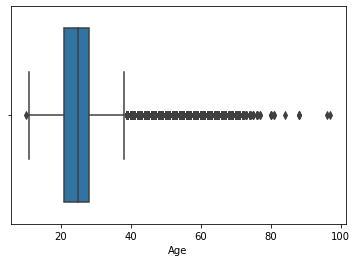

In [19]:
sns.boxplot(x =df_table);

In [20]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [21]:
print(Q1)
print(Q3)
print(IQR)

21.0
28.0
7.0


In [22]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [23]:
print(alt_sinir)
print(ust_sinir)

10.5
38.5


In [24]:
(df_table < alt_sinir) | ( df_table > ust_sinir)

0         False
1         False
2         False
3         False
4         False
          ...  
275638    False
275639    False
275640    False
275641    False
275642     True
Name: Age, Length: 266169, dtype: bool

In [25]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
df_table[aykiri_tf]

58        54.0
89        43.0
90        47.0
124       41.0
126       45.0
          ... 
275598    39.0
275615    44.0
275616    46.0
275629    39.0
275642    41.0
Name: Age, Length: 11258, dtype: float64

Baskılama metodu yerine silme metodu kullandığım veri setine daha uygun olacağını düşündüğüm için bu yöntemi seçtim.
Baskılama metodu sonucunda değerlerim eşik değerine sabitleneceği için eşik değerinin üstü için doğru hesaplamaları yapamayacaktım.

In [26]:
df_table = pd.DataFrame(df_table)
df_table.shape

(266169, 1)

In [27]:
#aykırı olmayanları seçiyoruz
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]
t_df.shape

(254911, 1)

In [28]:
df_table[aykiri_tf].index

Int64Index([    58,     89,     90,    124,    126,    127,    128,    129,
               269,    270,
            ...
            275561, 275579, 275582, 275587, 275588, 275598, 275615, 275616,
            275629, 275642],
           dtype='int64', length=11258)

In [29]:
df.shape

(275643, 6)

In [30]:
df.drop(df_table[aykiri_tf].index, axis=0, inplace=True)

In [31]:
df.shape

(264385, 6)

In [32]:
df[110:165]

,Name,Sex,Age,Team,Sport,Medal
113,Roald Edgar Aas,1,31.0,Norway,Speed Skating,3
114,Roald Edgar Aas,1,31.0,Norway,Speed Skating,0
115,Roald Edgar Aas,1,31.0,Norway,Speed Skating,0
116,Rolf Aas,1,28.0,Norway,Football,0
117,Thomas Valentin Aas,1,25.0,Taifun,Sailing,3
118,Morten Gjerdrum Aasen,1,34.0,Norway,Equestrianism,0
119,Meelis Aasme,1,25.0,Estonia,Cross Country Skiing,0
120,Meelis Aasme,1,25.0,Estonia,Cross Country Skiing,0
121,Meelis Aasme,1,29.0,Estonia,Cross Country Skiing,0
122,Meelis Aasme,1,29.0,Estonia,Cross Country Skiing,0


Eksik Değerlerin Tespit edilmesi. Burada doğrudan silme yöntemini kullandık çünkü ileri yaşlardaki yarışmacıların madalya kazanma olasılığı diğer yöntemlerde daha düşük çıkabilecekti, doğru hesaplamalar yapılamayacaktı.

In [33]:
df.isnull().sum()

Name        0
Sex         0
Age      9474
Team        0
Sport       0
Medal       0
dtype: int64

In [34]:
df.notnull().sum()

Name     264385
Sex      264385
Age      254911
Team     264385
Sport    264385
Medal    264385
dtype: int64

In [35]:
df.isnull()

,Name,Sex,Age,Team,Sport,Medal
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
275637,False,False,False,False,False,False
275638,False,False,False,False,False,False
275639,False,False,False,False,False,False
275640,False,False,False,False,False,False


In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(254911, 6)

In [38]:
df.isnull().values.any()

False

## 4. Kategorik Değişken Özetleri

In [39]:
katdf = df.select_dtypes(include = ["category"])

In [40]:
katdf.head()

,Team,Sport
0,China,Basketball
1,China,Judo
2,Denmark,Football
3,Denmark/Sweden,Tug-Of-War
4,Netherlands,Speed Skating


In [41]:
df["Sex"].value_counts()

1    180471
0     74440
Name: Sex, dtype: int64

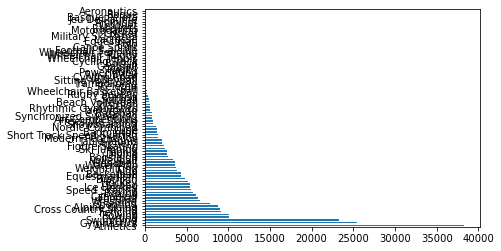

In [42]:
df["Sport"].value_counts().plot.barh();

<AxesSubplot:xlabel='Sex'>

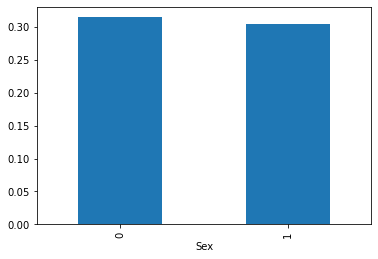

In [43]:
df[["Medal","Sex"]].groupby("Sex")["Medal"].mean().plot(kind="bar")

# Makine Öğrenmesi

## 1. Doğrusal Regresyon

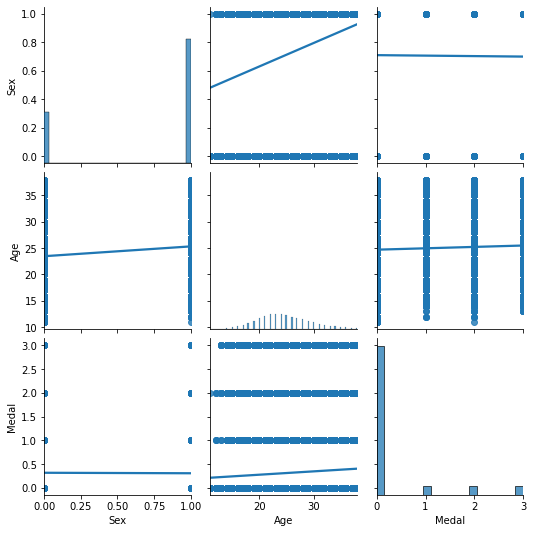

In [44]:
sns.pairplot(df, kind  ="reg")

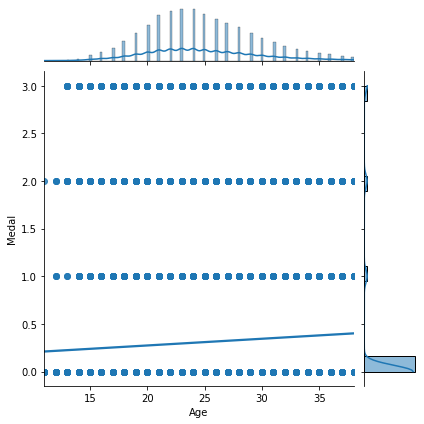

In [45]:
sns.jointplot(x = "Age", y = "Medal", data = df, kind = "reg")

In [46]:
X = df[["Age"]]
y = df["Medal"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.1324177901850776
[0.00704959]


In [47]:
model.score(X,y)

0.0018575281880639505

In [48]:
model.predict(X)[0:10]

array([0.30160799, 0.2945584 , 0.30160799, 0.37210391, 0.28045921,
       0.28045921, 0.30865758, 0.30865758, 0.32275676, 0.32275676])

In [49]:
y[0:10]

0    0
1    0
2    0
3    3
4    0
5    0
6    0
7    0
8    0
9    0
Name: Medal, dtype: int64

In [50]:
(0.13)+(25*0.007)

0.30500000000000005

In [51]:
model.predict([[25]])

array([0.30865758])

In [52]:
yeni_veri = [[5],[18],[22]]
model.predict(yeni_veri)

array([0.16766575, 0.25931044, 0.28750881])

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

lm = smf.ols("Medal ~ Age", df)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

0.6239765191464649

In [54]:
rmse = np.sqrt(mse)
rmse

0.7899218436949728

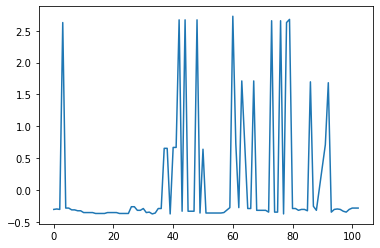

In [55]:
plt.plot(model.resid[:100])

### 1.2. Çoklu Doğrusal Regresyon

In [56]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,1,24.0,China,Basketball,0
1,A Lamusi,1,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,1,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,1,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,0,21.0,Netherlands,Speed Skating,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254911 entries, 0 to 275641
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Name    254911 non-null  object  
 1   Sex     254911 non-null  int32   
 2   Age     254911 non-null  float64 
 3   Team    254911 non-null  category
 4   Sport   254911 non-null  category
 5   Medal   254911 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 9.5+ MB


In [58]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,1,24.0,China,Basketball,0
1,A Lamusi,1,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,1,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,1,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,0,21.0,Netherlands,Speed Skating,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254911 entries, 0 to 275641
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Name    254911 non-null  object  
 1   Sex     254911 non-null  int32   
 2   Age     254911 non-null  float64 
 3   Team    254911 non-null  category
 4   Sport   254911 non-null  category
 5   Medal   254911 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 9.5+ MB


In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(203928, 2)
(203928,)
(50983, 2)
(50983,)


In [61]:
#verisetinin bütününün kopyası
training = df.copy()
training.shape

(254911, 6)

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

0.13741979938886567
[-0.02288492  0.00745623]


Tahmin

In [63]:
yeni_veri = [[1], [25]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1
0,1,25


In [64]:
model.predict(yeni_veri)

array([0.30094057])

In [65]:
yeni_veri2 = [[0], [25]]
yeni_veri2 = pd.DataFrame(yeni_veri2).T
yeni_veri2

,0,1
0,0,25


In [66]:
model.predict(yeni_veri2)

array([0.3238255])

In [67]:
from sklearn.metrics import mean_squared_error
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

0.7877891314438497

In [68]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

0.7980374237733182

Model Tuning / Model Doğrulama

In [69]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,1,24.0,China,Basketball,0
1,A Lamusi,1,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,1,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,1,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,0,21.0,Netherlands,Speed Skating,0


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(203928, 2)
(203928,)
(50983, 2)
(50983,)


In [71]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

0.7877891314438497
0.7980374237733182


0.0020497206448584215

In [72]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.0020136801125551274

In [73]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

0.787783307677958
0.7979453299601232


rmseTrain = 0.787783307677958 / 
rmseTest = 0.7979453299601232

### 1.3. PCR (Temel Bileşen Regresyonu - Principal Component Regression)

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (191183, 2)
y_train (191183,)
X_test (63728, 2)
y_test (63728,)
training (254911, 6)


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[-0.7813864 , -0.12833126]])

In [76]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %58,75ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %100ünü ifade ettiğini belirtir.

array([ 58.75, 100.  ])

In [77]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

0.3064027659363019
[-0.01777458  0.03353751]


Tahmin

In [78]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([0.31598767, 0.25593071, 0.36103039, 0.27845207, 0.28595919])

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

0.7884112188018152

In [80]:
df["Medal"].mean()

0.3070601111760575

In [81]:
r2_score(y_train, y_pred)

0.00208555809020472

In [82]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7941461888922481

Model Tuning

In [83]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7941461888922481


In [84]:
lm = LinearRegression()
#15 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7941461888922481


In [85]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,shuffle = True,random_state = 1)
lm = LinearRegression()
RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i], y_train.ravel(), cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

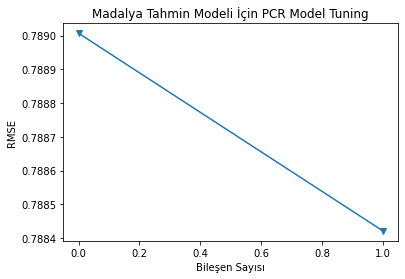

In [86]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Madalya Tahmin Modeli İçin PCR Model Tuning');

Grafikten de anlaşılacağı üzere bileşen sayısını 1 seçmek en düşük hataya erişmemizi sağlayacaktır.

In [87]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:1])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7889994109962581
0.7946808409876422


### 1.4. PLS (Kısmi En Küçük Kareler Regresyonu)

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [89]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
#pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

array([[-0.01114611],
       [ 0.03628322]])

In [90]:
X_train.head()

,Sex,Age
241952,1,27.0
238633,1,19.0
225994,1,33.0
210203,1,22.0
9189,1,23.0


In [91]:
pls_model.predict(X_train)

array([[0.31598767],
       [0.25593071],
       [0.36103039],
       ...,
       [0.30848055],
       [0.28793502],
       [0.37604463]])

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.7884112188018152

In [93]:
r2_score(y_train, y_pred)

0.00208555809020472

In [94]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.7941458893681376

Model Tuning

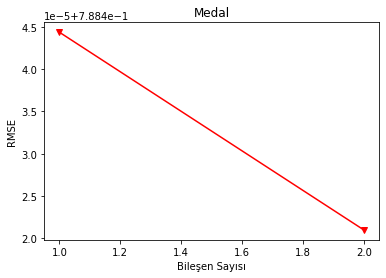

In [95]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Medal');

In [96]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [97]:
y_pred = pls_model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7941458893681376

### 1.5. Ridge Regresyon

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [100]:
from sklearn.linear_model import Ridge
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [101]:
ridge_model.coef_

array([-0.02449712,  0.00750712])

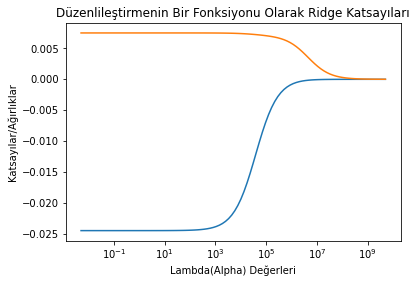

In [102]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

Tahmin

In [103]:
y_pred = ridge_model.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

0.7941458893666258

Model Tuning

In [105]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [106]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [107]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

0.005

In [108]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [109]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

0.7941455873757404

### 1.6. Lasso Regresyon

In [110]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [111]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [112]:
lasso_model.coef_

array([-0.        ,  0.00282239])

Text(0, 0.5, 'weights')

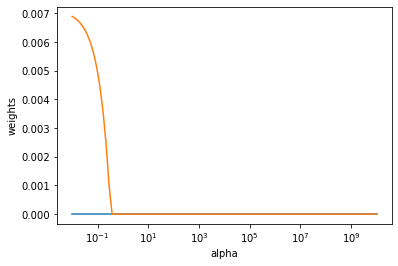

In [113]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Tahmin

In [114]:
lasso_model.predict(X_test)

array([0.34374827, 0.30423476, 0.2901228 , ..., 0.30141237, 0.29576758,
       0.29858998])

In [115]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.794452963493213

Model Tuning

In [116]:
from sklearn.linear_model import LassoCV

In [117]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [118]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [119]:
lasso_cv_model.alpha_

7.851774026062259e-08

In [120]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [121]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=7.851774026062259e-08)

In [122]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7941458891658332

### 1.7. ElasticNet (eNet) Regresyonu

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [124]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([-0.,  0.])

In [125]:
enet_model.intercept_

0.3064027659363019

Tahmin

In [126]:
enet_model

ElasticNet()

In [127]:
enet_model.predict(X_test)

array([0.30640277, 0.30640277, 0.30640277, ..., 0.30640277, 0.30640277,
       0.30640277])

In [128]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7949079416072564

In [129]:
r2_score(y_test, y_pred)

-1.094144546032183e-05

Model Tuning

In [130]:
from sklearn.linear_model import ElasticNetCV

In [131]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
enet_cv_model.alpha_

0.00033185916536154737

In [132]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [133]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7941455466616418

## 2. Doğrusal Olmayan Regresyon

### 2.1. K En Yakın Komşu (KNN)

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [136]:
knn_model

KNeighborsRegressor()

In [137]:
knn_model.n_neighbors #default değeri 5

5

In [138]:
knn_model.effective_metric_

'euclidean'

Tahmin

In [ ]:
y_pred = knn_model.predict(X_test)
print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))
RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


test hatası: 0.855331377304291
k = 1 için RMSE değeri:  1.2932445011938325
k = 2 için RMSE değeri:  0.9301541583183255
k = 3 için RMSE değeri:  0.900159786815573


Model Tuning

In [ ]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

In [ ]:
#k=2 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =2)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

### 2.2. Destek Vektör Regresyonu (SVR)

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,1,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()
svr_model = LinearSVR().fit(X_train, y_train)
svr_model.predict(X_train)[0:5]

In [ ]:
#dogrusal modelimizin parametre katsayilari
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0])) 

In [ ]:
X_train["Age"][0:1]

In [ ]:
-0.05621152054739784 + -0.0019988280777343236*27

In [ ]:
y_pred = svr_model.predict(X_train)

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [ ]:
#lineer regresyon modeliyle svm modelini karsilastiralim
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

In [ ]:
#lineer regresyon ile elde ettigimiz parametre katsayilari
0.13046685554343962 + 0.007103314368463613*27

In [ ]:
#iki yontemi de gorsel olarak karsilastiralim
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Yaş")
plt.ylabel("Madalya")

Not: Yukarıdaki grafik gözlemlendiğinde,

lineer regresyon yöntemiyle elde edilen doğru (yeşil) yaş değerine göre daha fazla madalya verme eğilimindedir. Bunun sebebi grafiğin üstünde ki kazanılan madalya sayılarıdır.

SVR'de ise (robust bir yontem oldugundan) aykırı gözlemlerin etkisi daha düşüktür.

 Tahmin (Doğrusal SVR)

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0])) 

In [ ]:
svr_model.predict([[27]])

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_ squared_error(y_test, y_pred))

 Model Tuning (Doğrusal SVR)

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
svr_model.intercept_

In [ ]:
svr_model.coef_

Tahmin (Doğrusal Olmayan SVR)

In [ ]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

Model Tuning (Doğrusal Olmayan SVR)

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(sv  r_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))